# <font color="#FDF4F2" style="background-color: #F8866A;">Cozy Gaming Behavior Analysis</font>
-------------


In [84]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

%matplotlib inline


In [3]:
# Check Data
df = pd.read_csv('synthdata2.csv')


In [4]:
#Renaming columns for better data management

df.rename(columns ={df.columns[0] : 'Date_stamp', df.columns[3] :'Game_Category', 
                     df.columns[4] :'Gaming_Frequency', df.columns[5] :'Game_Discovery',
                    df.columns[6] : 'Weekly_Gaming_Time', df.columns[7] : 'Game_Purchase',
                    df.columns[8] : 'Game_Purchase_Category', df.columns[9] : 'Storyline_Rating', 
                    df.columns[10] :'Graphics_Rating', df.columns[11] : 'Atmosphere_Rating',
                    df.columns[12] : 'Coplay_Rating', df.columns[13] : 'Gameplay_Rating', 
                    df.columns[14] : 'Recommendation', df.columns[15] : 'Game_Likelihood',
                    df.columns[16] : 'Music_Role', df.columns[17] : 'Device',
                    df.columns[18] :'Game_Names'}, inplace = True)



df.head()

,Date_stamp,Gender,Age,Game_Category,Gaming_Frequency,Game_Discovery,Weekly_Gaming_Time,Game_Purchase,Game_Purchase_Category,Storyline_Rating,Graphics_Rating,Atmosphere_Rating,Coplay_Rating,Gameplay_Rating,Recommendation,Game_Likelihood,Music_Role,Device,Game_Names
0,2023/05/03 3:01:47 a. m. GMT-4,Male,26-30,Simulation games,Weekly,Online reviews and ratings,2-5 hours,$10-$25,NaN,Important,Somewhat Important,Important,Important,Regular,Yes,Somewhat Likely,It helps me relax and focus,Mobile Phone,NaN
1,2023/04/06 12:48:52 a. m. GMT-4,Male,41-45,Casual games,Occasionally,Word of mouth,2-5 hours,$0,Other,Regular,Important,Very Important,Important,Not Important,No,Neutral,"I appreciate the music, but it is not essentia...",Other,Endless Ocean (love the feel of water/swimming...
2,2023/04/07 12:17:24 a. m. GMT-4,Female,26-30,Casual games;Simulation games,Weekly,Social media recommendations;Word of mouth;Onl...,1-2 hours,$0,Cosmetics or skins,Regular,Very Important,Important,Not Important,Very Important,Yes,Somewhat Likely,It is essential to my gaming experience,PC/Laptop,"Animal crossing, is relaxing and addictive. Al..."
3,2023/04/06 2:04:56 p. m. GMT-4,Female,21-25,Simulation games,Weekly,Word of mouth,2-5 hours,$0,NaN,Important,Very Important,Very Important,Important,Regular,No,Very Likely,"I appreciate the music, but it is not essentia...",PC/Laptop;Gaming Console,"I think I was emailed the wrong survey, I excl..."
4,2023/04/09 12:17:00 a. m. GMT-4,Female,26-30,Other,Weekly,Online reviews and ratings,2-5 hours,Less than $10,Virtual currency,Not Important,Very Important,Important,Important,Important,Yes,Neutral,It helps me relax and focus,PC/Laptop;Gaming Console,NaN


In [5]:
#Missing Data in %
df.isnull().mean()*100

Date_stamp                 0.000000
Gender                     0.000000
Age                        0.000000
Game_Category              0.000000
Gaming_Frequency           0.000000
Game_Discovery             0.000000
Weekly_Gaming_Time         0.000000
Game_Purchase              0.000000
Game_Purchase_Category    21.433333
Storyline_Rating           0.000000
Graphics_Rating            0.000000
Atmosphere_Rating          0.000000
Coplay_Rating              0.000000
Gameplay_Rating            0.000000
Recommendation             0.000000
Game_Likelihood            0.000000
Music_Role                 0.000000
Device                     0.000000
Game_Names                24.400000
dtype: float64

In [7]:
#Read unique values
#Gender
unval_gen = df['Gender'].unique()

#Gameplay Rating
unval_gpr = df['Gameplay_Rating'].unique()

#Age
unval_age = df['Age'].unique()

#weekly gaming time
unval_wgt = df['Weekly_Gaming_Time'].unique()

#Game purchase
unval_gp = df['Game_Purchase'].unique()

print(unval_gen)
print(unval_gpr)
print(unval_age)
print(unval_wgt)
print(unval_gp)

['Male' 'Female' 'Male;Non-Binary']
['Regular' 'Not Important' 'Very Important' 'Important'
 'Somewhat Important' 'Very Importante']
['26-30' '41-45' '21-25' '16-20' '31-35' '36-40']
['2-5 hours' '1-2 hours' 'More than 10 hours' 'Less than 1 hour']
['$10-$25' '$0 ' 'Less than $10' 'More than $50' 'Menos de $10']


# <font color="#F8866A" style="background-color: #FDF4F2;">Data Cleaning</font>
-------

In [8]:
#Data cleaning 

#Defining Data discrepancies; data found in spanish, for example
rating_values = {'Very Importante': 'Very Important'}
purchase_values = {'Menos de $10':'Less than $10'}

#Mapping current rating values to numeric values
map_rating_val = {'Not Important': 1,'Somewhat Important': 2,'Regular': 3,'Important': 4,'Very Important': 5}

#Replacing values
#Graphics
df['Graphics_Rating'] = df['Graphics_Rating'].replace(map_rating_val)

#Storyline

df['Storyline_Rating'] = df['Storyline_Rating'].replace(map_rating_val)

#Atmosphere
df['Atmosphere_Rating'] = df['Atmosphere_Rating'].replace(rating_values)
df['Atmosphere_Rating'] = df['Atmosphere_Rating'].replace(map_rating_val)

#Coplay
df['Coplay_Rating'] = df['Coplay_Rating'].replace(map_rating_val)


#Gameplay
df['Gameplay_Rating'] = df['Gameplay_Rating'].replace(rating_values)
df['Gameplay_Rating'] = df['Gameplay_Rating'].replace(map_rating_val)

#Grouping Gender Values
map_gen_val = {'Male;Non-Binary': 'Other'}
df['Gender'] = df['Gender'].replace(map_gen_val)

df['Game_Purchase'] = df['Game_Purchase'].replace(purchase_values)

In [6]:
#Column Data Types Check
df.dtypes

Date_stamp                object
Gender                    object
Age                       object
Game_Category             object
Gaming_Frequency          object
Game_Discovery            object
Weekly_Gaming_Time        object
Game_Purchase             object
Game_Purchase_Category    object
Storyline_Rating          object
Graphics_Rating           object
Atmosphere_Rating         object
Coplay_Rating             object
Gameplay_Rating           object
Recommendation            object
Game_Likelihood           object
Music_Role                object
Device                    object
Game_Names                object
dtype: object

# <font color="#F8866A" style="background-color: #FDF4F2;">Definitions</font>
-------

In [81]:
#Summarizing code Pt. 1, information used throughout the code

# Defining Color palettes
palette = sns.color_palette('spring_r')
color = 'spring_r'

#Spectral, Spectral_r, Spring_r

#Defining counts of grouped columns
#Gender
gender_counts = df.groupby('Gender').count()
#Age
age_counts = df.groupby('Age').count()

# <font color="#F8866A" style="background-color: #FDF4F2;">Analysis Starts Here!</font>
--------

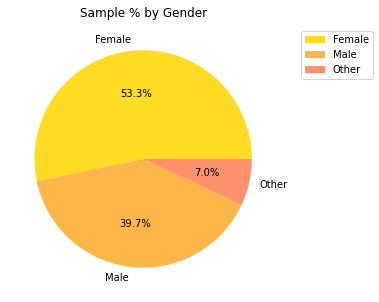

In [82]:
#% of sample by Gender
gender_counts.plot.pie(y='Age',figsize=(5,5),autopct='%1.1f%%',colors=palette)
plt.title('Sample % by Gender')
plt.gca().set_ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

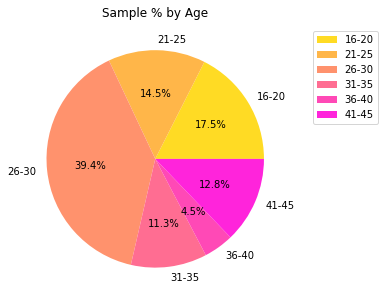

In [83]:
#% of sample by age
age_counts.plot.pie(y='Gender',figsize=(5,5),autopct='%1.1f%%',colors=palette)
plt.title('Sample % by Age')
plt.gca().set_ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

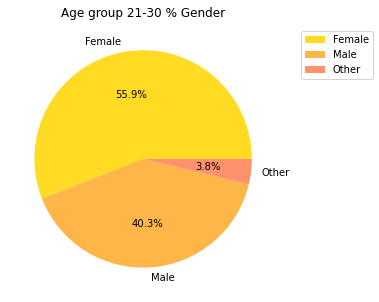

In [69]:
#Defining a filtered df for age groups 21-30 and a count grouped by gender using the filtered df
groupedagedf = df[(df['Age']=='26-30') | (df['Age']=='21-25')]
newgen_counts = groupedagedf.groupby('Gender').count()

newgen_counts.plot.pie(y='Age',figsize=(5,5),autopct='%1.1f%%',colors=palette)
plt.title('Age group 21-30 % Gender')
plt.gca().set_ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

**<font color="#E81CD2" style="background-color: #FDF4F2;">FINDINGS</font>**

<font color="#635B61">Almost 50% of our sample is people from 21-30 Years old where almost 56% is female and 40% is Male leaving the Other % with almost 4%</font>



# <font color="#F8866A" style="background-color: #FDF4F2;">Feature Ratings Comparison by Age</font>
-------------

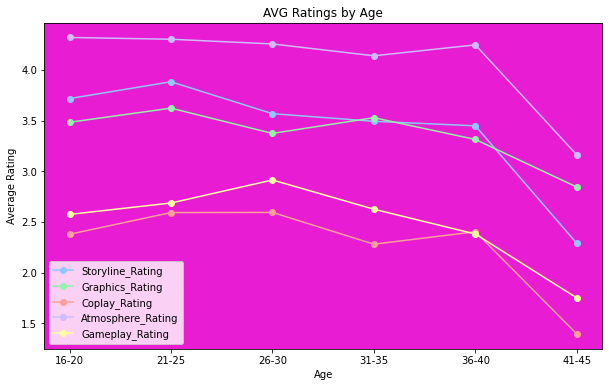

In [76]:
#Rating Categories Compared by Age using main df 

# List of columns to compare
columns_to_compare = ['Storyline_Rating', 'Graphics_Rating', 'Coplay_Rating','Atmosphere_Rating','Gameplay_Rating']

# Group the DataFrame by 'Age' and calculate the mean ratings for each age group
age_mean_ratings = df.groupby('Age')[columns_to_compare].mean().reset_index()

# Converting columns to NumPy arrays
age = age_mean_ratings['Age'].to_numpy()
ratings = age_mean_ratings[columns_to_compare].to_numpy()

# Set the figure size
plt.figure(figsize=(10, 6))

# Loop through columns and plot
for i, column in enumerate(columns_to_compare):
    plt.plot(age, ratings[:, i], label=column, marker='o')

plt.gca().set_facecolor('#E81CD2')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('AVG Ratings by Age')
plt.legend()


plt.show()



**<font color="#E81CD2" style="background-color: #FDF4F2;">FEATURE DEFINITIONS</font>**

<font color="#635B61">1. _Atmosphere:._  Relaxing Atmosphere</font>

<font color="#635B61">2. _Graphics:._ Attractive Graphics</font>

<font color="#635B61">3. _Storyline:._ Engaging Storyline</font>

-------------------------------------------
<font color="#635B61">On the graph above we can see that the *Atmosphere Rating* and the *Engaging Storyline Rating* are the options that have the **highest** ratings by age. 

On all Ratings we can see a decrease by age. Atmosphere rating being the highest on the 36-40 group age and Storyline Rating being the highest on the 21-25 age group. 

**Last age group gave very low ratings meaning they don´t care that much about the ratings mentioned to play a cozy videogame, since they are 12% of our sample, we can neglect this group to continue with the analysis**

Now let´s create graphs more detailed towards the top 3 Ratings: Atmosphere, Storyline and Graphics. </font>





# <font color="#F8866A" style="background-color: #FDF4F2;">Definitions Pt.2</font>
-----------

In [14]:
#Part 2

#Create new data frame neglecting last age group 41-45
newdf = df[df['Age'] != '41-45']

#defining counts and grouped df with newdf
newdf_gen_counts = newdf.groupby('Gender').count()

# <font color="#F8866A" style="background-color: #FDF4F2;">Top Rated Features by Age & Gender</font>
------------

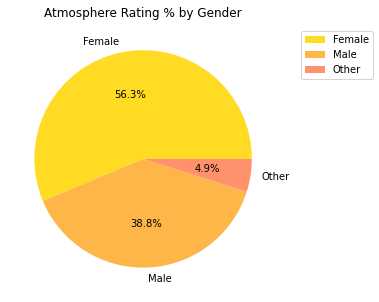

In [15]:
#Top Rated Feature % by age
newdf_gen_counts.plot.pie(y='Atmosphere_Rating',figsize=(5,5),autopct='%1.1f%%',colors=palette)
plt.title('Atmosphere Rating % by Gender')
plt.gca().set_ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

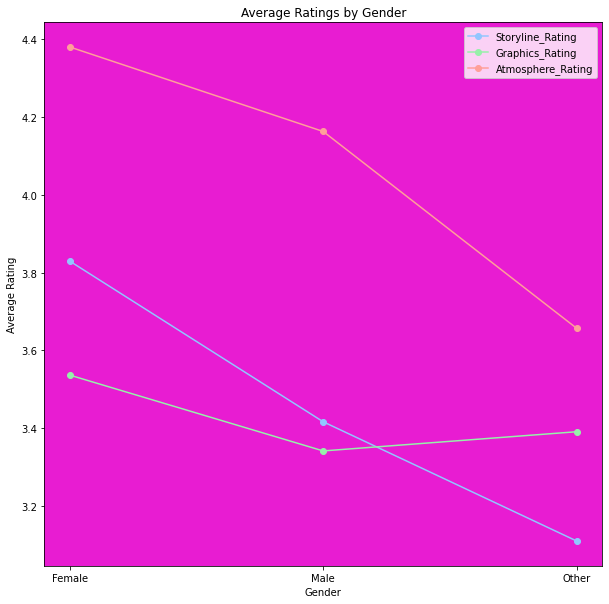

In [77]:
# Top Rated Features by Gender
# List of columns you want to compare
columns_to_compare_g = ['Storyline_Rating', 'Graphics_Rating', 'Atmosphere_Rating']

# Group the DataFrame by 'Gender' and calculate the mean ratings for each age group
gender_mean_ratings = newdf.groupby('Gender')[columns_to_compare_g].mean().reset_index()

# Convert columns to NumPy arrays
gen = gender_mean_ratings['Gender'].to_numpy()
ratings_g = gender_mean_ratings[columns_to_compare_g].to_numpy()

# Set the figure size
plt.figure(figsize=(10, 10))

# Loop through columns and plot
for i, column in enumerate(columns_to_compare_g):
    plt.plot(gen, ratings_g[:, i], label=column, marker='o')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Gender')
plt.gca().set_facecolor('#E81CD2')
# Show the legend
plt.legend()

# Show the plot
plt.show()


**<font color="#E81CD2" style="background-color: #FDF4F2;">FINDINGS</font>**

<font color="#635B61">In the visualizations above,a clear trend emerges, is evident that **female users** consistently assign **higher ratings** compared to other users. This suggests that our female users assign more importance to the above features compared to other player. Notably, the relaxing atmosphere stands out as the most highly-rated feature when it comes to selecting the ideal game for a cozy gaming experience, regardles of gender.

Additionally, it's worth highlighting that the distribution of ratings between female and male users is almost evenly split, with each gender contributing approximately half of the total ratings. This balanced distribution prompts the need for further in-depth analysis to uncover more insights.</font>


DO a % pie chart on spent categories to illustrate the ammount and then neglect from below chART

# <font color="#F8866A" style="background-color: #FDF4F2;">Purchases in Game - Analysis</font>
------

<font color="#635B61">Using the new df that only looks at part of the sample (filtered age sample) we are going to take a look at what type of users are spending the most in the games and what is the particular categories that lead to the purchases</font>


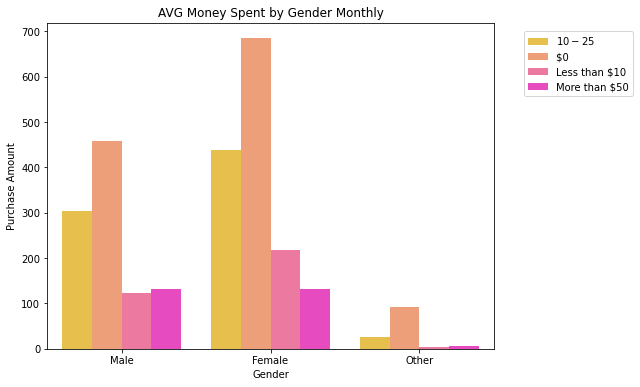

In [18]:
#Game purchases by gender
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=newdf,hue='Game_Purchase', palette=color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Purchase Amount')
plt.title('AVG Money Spent by Gender Monthly')
plt.show()

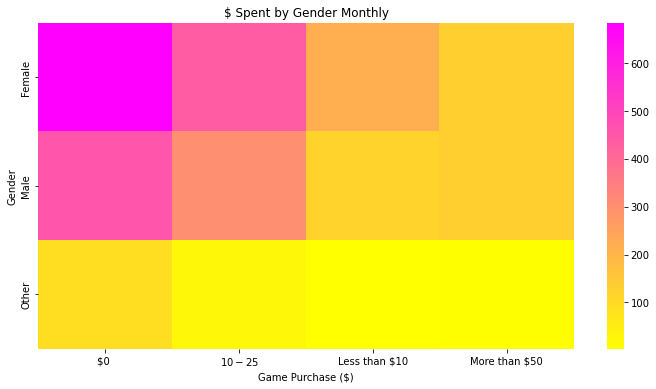

In [19]:
#Purchases by gender heatmap
h_map_purchase = newdf.groupby(by=['Gender','Game_Purchase']).count()['Age'].unstack().sort_index(axis=0, level='Game_Purchase',ascending=True)

#Heat map how much $ was spent by gender

plt.figure(figsize=(12,6))
sns.heatmap(h_map_purchase,cmap=color)
plt.xlabel('Game Purchase ($)')
plt.ylabel('Gender')
plt.title('$ Spent by Gender Monthly')
plt.show()


**<font color="#E81CD2" style="background-color: #FDF4F2;">New df and filtered grouped count</font>**


In [20]:
# Create a filtered df only using the highest purchase value range 10-25
purchase_newdf = newdf[newdf['Game_Purchase'] == '$10-$25']

# count of 10-25 purchases for each gender category 
purchase_bygen_counts = purchase_newdf.groupby('Gender').size()

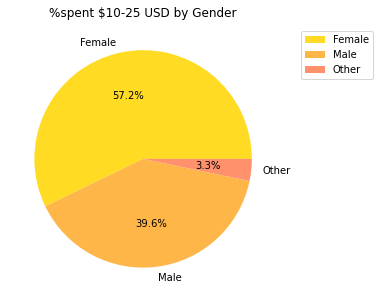

In [21]:
# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(purchase_bygen_counts, labels=purchase_bygen_counts.index, autopct='%1.1f%%', colors=palette)
plt.title('%spent $10-25 USD by Gender')
plt.gca().set_ylabel('')  # Remove the default ylabel
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

<font color="#635B61">An interesting observation from the above visualizations makes it clear that most of our users prefer not to spend money on cozy games. However, it´s particularly intriguing that the largest spending group, accounting for 53% of the sample, happens to be our female users, with an average monthly expenditure falling in the range of 10-25 USD</font>


**<font color="#E81CD2" style="background-color: #FDF4F2;">New df filtered to only Gender == Female (our highest sample%) and excluding the 'Other' category from the Game Purchase Category column</font>**


In [22]:
#new df
femother_df = newdf[(newdf['Gender']== 'Female')&(newdf['Game_Purchase_Category']!='Other')]

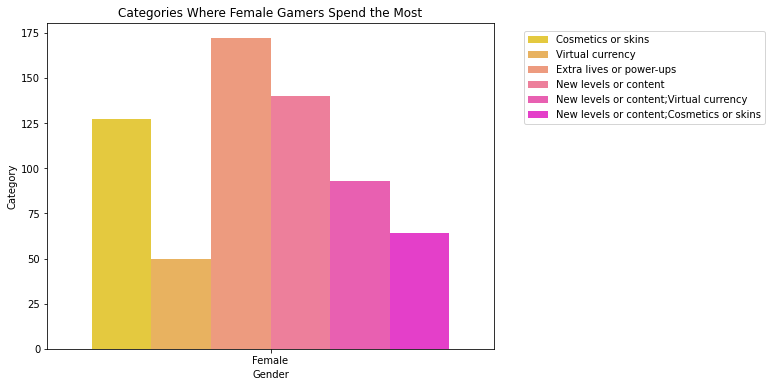

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=femother_df,hue='Game_Purchase_Category', palette=color)

# Relocating legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Category')
plt.title('Categories Where Female Gamers Spend the Most')
plt.show()

**<font color="#E81CD2" style="background-color: #FDF4F2;">FINDINGS</font>**

<font color="#635B61">In the graph above, we intentionally excluded the 'Other' value from the Game_Purchase_Category. This decision was made because 'Other' was the dominant category in purchases, yet it lacks specific data for a more in-depth analysis. Instead, our focus shifted to the second and third-highest categories: 'Extra Lives/Power Ups' and 'New Levels or Content,' where we can potentially gain more valuable insights into user spending behavior.</font>


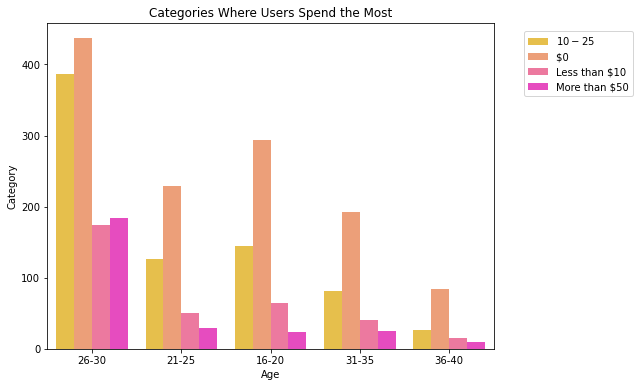

In [24]:
#Taking newdf (filtered df excluding age group 41-45)
plt.figure(figsize=(8,6))
sns.countplot(x='Age',data=newdf,hue='Game_Purchase', palette=color)

# Relocating legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Category')
plt.title('Categories Where Users Spend the Most')
plt.show()

Would be a good idea to ad a % spent monthly or see the max for each group like a cluster to see which group is spending the most 

#  <font color="#F8866A" style="background-color: #FDF4F2;">Which age groups spent the most? and in what?</font>

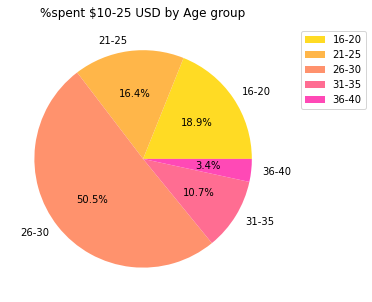

In [25]:
#using the purchase_newdf = newdf filtered by the highest purchase category 10-25 USD monthly 

# count of 10-25USD purchases for each age category
purchase_age_counts = purchase_newdf.groupby('Age').size()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(purchase_age_counts, labels= purchase_age_counts.index, autopct='%1.1f%%', colors=palette)
plt.title('%spent $10-25 USD by Age group')
plt.gca().set_ylabel('')  # Remove the default ylabel
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()


<font color="#635B61">We can see that the age group that spent the most was the 26-30 having 50% of the sample group with an average of 10-25USD Monthly, followed by the 16-20 age group and in third place 21-25.</font>


#  <font color="#F8866A" style="background-color: #FDF4F2;">Now let´s analyze the 21-25 group and see where they are spending the most</font>


**<font color="#E81CD2" style="background-color: #FDF4F2;">New filtered df by age group</font>**

In [26]:
#Filtered newdf by Age group 26-30 (top spending group) and exclude the other category from game purchase category
topage_group_df = newdf[(newdf['Age']== '26-30')&(newdf['Game_Purchase_Category']!='Other')]

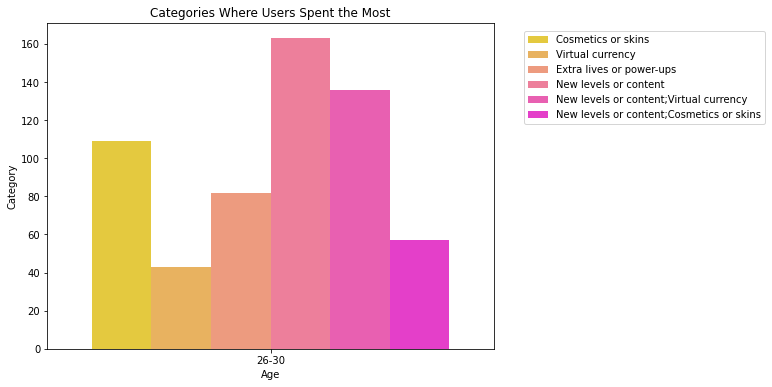

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='Age',data=topage_group_df,hue='Game_Purchase_Category', palette=color)

# Relocating legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Category')
plt.title('Categories Where Users Spent the Most')
plt.show()

**<font color="#E81CD2" style="background-color: #FDF4F2;">FINDINGS</font>**

<font color="#635B61">We can see that our 50% of the sample users from 26-30, prefer to spend their money on Virtual Currency and New levels.</font>



# <font color="#F8866A" style="background-color: #FDF4F2;">Other Insights</font>

**<font color="#635B61">How does music impact cozy gamers?</font>**


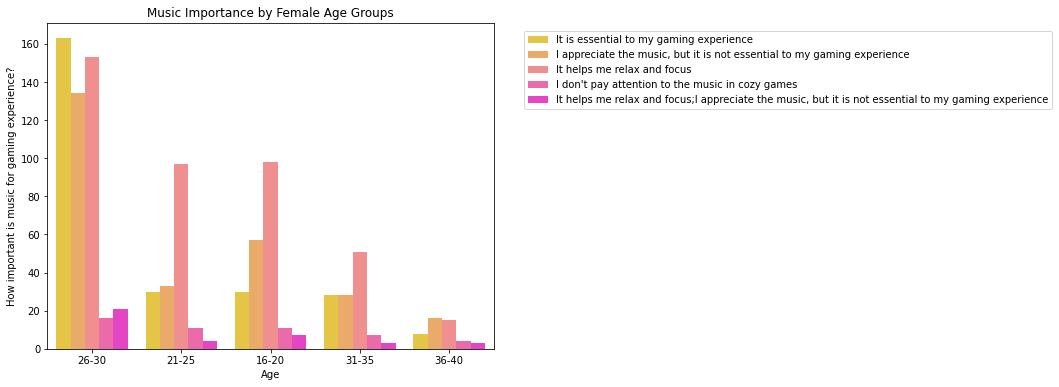

In [28]:
#MUSIC ; Overall for females any age the music helps relax and focus
plt.figure(figsize=(8,6))
sns.countplot(x='Age',data=femother_df,hue='Music_Role', palette=color)

# Relocating legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('How important is music for gaming experience?')
plt.title('Music Importance by Female Age Groups')
plt.show()

**Type of popular cozy game categories among users**

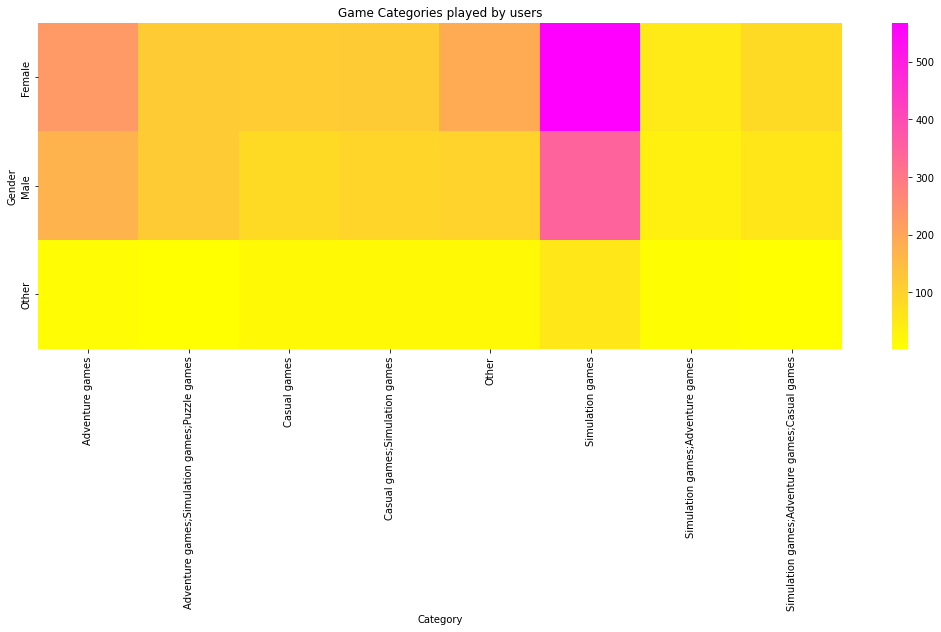

In [29]:
# we have data grouped together by ; make sure to group it together or cluster for better insight
#Device where most people play cozy games and type of cozy games more played


h_map_cozygame_type = newdf.groupby(by=['Gender','Game_Category']).count()['Age'].unstack().sort_index(axis=0, level='Game_Category',ascending=True)

#Heat map how much $ spent by gender

plt.figure(figsize=(18,6))
sns.heatmap(h_map_cozygame_type,cmap=color)
plt.xlabel('Category')
plt.ylabel('Gender')
plt.title('Game Categories played by users')
plt.show()


**Popular devices for playing cozy videogames**

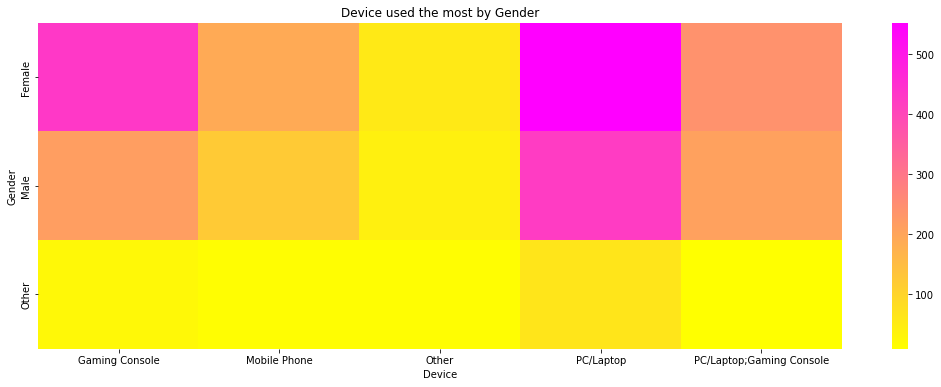

In [30]:
h_map_device = newdf.groupby(by=['Gender','Device']).count()['Age'].unstack().sort_index(axis=0, level='Device',ascending=True)

#Heat map how much $ spent by gender

plt.figure(figsize=(18,6))
sns.heatmap(h_map_device,cmap=color)
plt.xlabel('Device')
plt.ylabel('Gender')
plt.title('Device used the most by Gender')
plt.show()

Gaming console and PC most popular

# <font color="#FDF4F2" style="background-color: #F8866A;">CONCLUSION</font>

<font color="#635B61">**Conclusion**

In our exploration of cozy gaming, we unearthed intriguing insights into player behavior, preferences, and spending habits, shedding light on this captivating gaming genre.
    
**Demographics and Popularity**
    
Analysis of the data revealed that simulation and adventure games emerge as the frontrunners in the cozy gaming category, captivating both women and men between the ages of 16 and 35. Our sample showed that the 26-30 age group dominates the cozy gaming landscape, representing nearly 40% of the respondents. Notably, women displayed a 13.6% higher inclination toward cozy gaming than their male counterparts, particularly within the age group of 21-30, where females accounted for 56% of respondents.

**Key Features**
    
Our findings underscore the paramount importance of atmosphere, storyline, and graphics in cozy gaming. These features emerged as top priorities for gamers, suggesting that investment in creating a relaxing atmosphere, enhancing graphics quality, and crafting engaging storylines should be prioritized. Female gamers, in particular, assigned higher importance to these features compared to their male counterparts. This insight provides valuable guidance for developers aiming to enhance the cozy gaming experience.

**Expenditure Patterns**
    
An intriguing facet of our analysis pertains to expenditure patterns. On average, both male and female gamers spend between 10 to 25 USD monthly on cozy games. The 26-30 age group emerges as the leading spender, constituting 50% of the sample within this expenditure range. Within this age group, our analysis indicates a predilection for investing in virtual currency and new levels. This presents an opportunity for developers to target and tailor their offerings to cater specifically to the preferences of this age group.

**Future Directions**
    
While our analysis has yielded valuable insights, there remain avenues for further exploration. Future investigations could delve into other spending categories not covered in this study, capturing a percentage of the sample about which we currently have limited information. Identifying additional spending categories could provide a more comprehensive understanding of cozy gamers' preferences and habits, offering valuable direction for game development and marketing strategies.</font>


**sources for color palettes:**
1. https://htmlcolorcodes.com/
2. supported palette values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'